# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [196]:
#!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
#!unzip bus-breakdown-and-delays.zip

## Importing Libraries

In [293]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers

!pip install summarytools
from summarytools import dfSummary

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [294]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [295]:
df.shape

(147972, 21)

In [296]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [298]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,School_Year[object],1. 2016-20172. 2015-20163. 2017-20184. 2019-2020,"83,141 (56.2%)63,184 (42.7%)1,646 (1.1%)1 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACBUlEQVR4nO3cwY3aUBSG0WsLTcLGCCFRQrKjAIpIsSmCAlimB4TwIkxmQxaDwkjZ5v1GzjkVXNAH5lm+dLfbrSChn3oA/h9iI6arqmVVvUw9yEy93W6369RDPIvFZrP5NgzDeupB5mgcx3PXdd8F924xDMN6v99fV6vV69TDzMnlcvl8OBzWp9PpparEVlWLqqrVavW63W5/Tj3MDC2nHuCZOCAQIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzGLqvfHYaYeZG68p39bjON4PhwO6/I4zD83juO5qt6mnuNZeCy8LY+Ff9BZ5SPFAYEYl9EHl7zGbFfd2YRqz3ZV2YRKsV314NZPYw4IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2Iixyldef4pVvjtrd+3ZQXiwg9CYVT5iPn6z+WTT1J/tKttFtNYPw7De7XZ1X+fz241m+qqq5XL5a+pBmD83dYkRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLER01dVXa/XT1MPwvz14ziej8ej7SKas4NAjO0qYhwQiOm7rvvadZ2/H6C5vqq+VJXTKM25jBIjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI2Yvqp+VJV/C6c5Cy/EuIwSIzZifgPObZmOjWOeuQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Busbreakdown_ID[int64],Mean (sd) : 1287778.9 (43243.4)min < med < max:1212681.0 < 1287843.5 < 1362605.0IQR (CV) : 74753.5 (29.8),"147,972 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACM0lEQVR4nO3XO4/aQBSG4TOwQcMltrgEOpqU6SzR0KRLmR+7bXqQtqZIk4oGISFjhLMoiDgVZQj2JOt82vdp4XjM8YsErigKA/53jbpvALjHQ9038K8459pm1gq4RMPMforNmpn9KIriOWC+ssCd37zvP4YaeHjo0qvO+8Fg8CmO426VQy+Xy5s8z9/3er1vjUbjrDB7td/vj865L2Z2qjAe8ryCdn44HFLn3OPvYr0ZqnOuPRwOP0dR1C97cOjSQ+bP57M3sw+z2expNBodyp69Xq/7q9XqXZIkXyeTSaowa2a22WzeLpfLj9PpdNRsNkuFGvq8QnaeZZlfLBb93W7XMrPyoZpZK4qi/nw+f47juNQHD136X3jgHe/9eTwefy97dpqmbTOzbrd7Kjtf1+x13nvfSZLk9NJfktCdm1n71ot3/UaN47iWpVedv86+VnV9ScrOlMG/fkggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEh4uOdNWZb5shc+Ho/ezCzPc7/dbjsvOa96tup9h87f09cvQ+cyuxRcbsYAAAAASUVORK5CYII="">",0(0.0%)
3,Run_Type[object],1. Special Ed AM Run2. Pre-K/EI3. Special Ed PM Run4. General Ed AM Run5. General Ed PM Run6. Special Ed Field Trip7. General Ed Field Trip8. Project Read PM Run9. nan10. Project Read AM Run11. other,"85,990 (58.1%)20,951 (14.2%)17,672 (11.9%)17,182 (11.6%)4,541 (3.1%)628 (0.4%)570 (0.4%)300 (0.2%)89 (0.1%)47 (0.0%)2 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD+0lEQVR4nO3dwW0bVwBF0T8C4cQbEgQBlZD0oCJcbIpgEe5BEMSF7XjDLOwsbFOSFzN3APKcCj6E6/kmMU+azufzgMLd2gfgdoiNjNjIiI2M2MiIjYzYyIiNjNjITGOM92OMd2sf5AZ8PZ/Pn9c+xJo2h8Phw3a73a99kGt3Op2epmn655aD22y32/3Dw8Pn3W73Ze3DXKvn5+c/j8fj/vHx8d0Y43ZjG2OM3W735f7+/tPah7ly79c+wNp8QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKbMb69b7X2Qa6Zn+83m9Pp9HQ8HvfD+1aLOp1OT2OMr2ufY002CJ2b3yBMfmUWlSWfbDf/L5kfLbausibiZ4usq6yJuGTJdZVPt/zAl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkFhm8GHhwyWKDFwMPfua1cDIGL2TmfrJ5mvGiWQcvRi68ZrbBi5ELb5l78GLkwot8qUtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZmtsGLkQtvmXXwYuTCa7wWTsbghYwPCGTmvEZdobxqtnWVZRVvmWVdZVnF75hzXWVZxat8QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMzy7rKsorfMdu6yrKKt3gtnIx1FZmXnmyeUszu4uDFeIUl/DJ4MV5hKS8NXoxXmJ0vdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mj8MngxXmEpFwcvxisswWvhZAxeyPz/ZBueZCxtczgcPowxhoELS7vbbrf77+uquf4MJFzkezYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7P5vqQaw5qKhdkgkLGuIuPJRsa6iox1FRlffZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IeO1cDIGL2T8n43M3TRNf0/T5G+Msri7McZfY4w/1j4I1881SkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5m6M8XGM8e/aB+H62SCQcY2SERsZsZGxriJjXUXGNUpGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1

In [299]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [300]:
df.drop('Incident_Number', axis=1, inplace=True)

In [301]:
df = df.convert_dtypes()

In [302]:
df.dtypes

,0
School_Year,string[python]
Busbreakdown_ID,Int64
Run_Type,string[python]
Bus_No,string[python]
Route_Number,string[python]
Reason,string[python]
Schools_Serviced,string[python]
Occurred_On,string[python]
Created_On,string[python]
Boro,string[python]


In [303]:
df['School_Year'] = df['School_Year'].str.slice(start=0, stop=4).astype('int')

df['Bus_No_is_numeric'] = df['Bus_No'].str.isnumeric()
df = df[df['Bus_No_is_numeric'] == True]
df.drop('Bus_No_is_numeric', axis=1,inplace=True)

In [304]:
df['Schools_Serviced_is_numeric'] = df['Schools_Serviced'].str.isnumeric()
df = df[df['Schools_Serviced_is_numeric'] == True]
df.drop('Schools_Serviced_is_numeric', axis=1,inplace=True)

In [305]:
df['Boro'] = df['Boro'].fillna(df['Boro'].mode()[0])
df['Reason'] = df['Reason'].fillna(df['Reason'].mode()[0])
df['Run_Type'] = df['Run_Type'].fillna(df['Run_Type'].mode()[0])
df['Route_Number'] = df['Route_Number'].fillna(df['Route_Number'].mode()[0])

df['How_Long_Delayed'] = df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0])
df['Route_Number'] = df['Route_Number'].fillna(df['Boro'].mode()[0])


In [306]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [307]:
categorical_columns = df.astype('string').columns
le = LabelEncoder()
for col in categorical_columns:
  df[col] = le.fit_transform(df[col])

In [308]:
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

Imbalanced data

In [309]:
df['Breakdown_or_Running_Late'].value_counts()

,count
Breakdown_or_Running_Late,
1,77946
0,8972


In [310]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

Now it's balanced!

In [311]:
y.value_counts()

,count
Breakdown_or_Running_Late,
1,77946
0,77946


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [333]:
model = Sequential()
model.add(Dense(units=6, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [337]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [339]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 6)                   │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 2)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 782 (3.06 KB)

 Trainable params: 260 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 522 (2.04 KB)

## Training the Model
Train the ANN model using the training data.

In [338]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
3654/3654 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6233 - loss: 25.7134
Epoch 2/10
3654/3654 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7443 - loss: 0.5540
Epoch 3/10
3654/3654 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7334 - loss: 0.5624
Epoch 4/10
3654/3654 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7667 - loss: 0.4650
Epoch 5/10
3654/3654 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8115 - loss: 0.4075
Epoch 6/10
3654/3654 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8678 - loss: 0.3449
Epoch 7/10
3654/3654 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8853 - loss: 0.3160
Epoch 8/10
3654/3654 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8916 - loss: 0.3017
Epoch 9/10
3654/3654 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8957 - loss: 0.2926
Epoch 10/10
3654/3654 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8935 - loss: 0.2964


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [340]:
model.evaluate(X_test,y_test)

1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8966 - loss: 0.2764


[0.27651751041412354, 0.8963897824287415]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [347]:
y_pred = model.predict(X_test)

1218/1218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

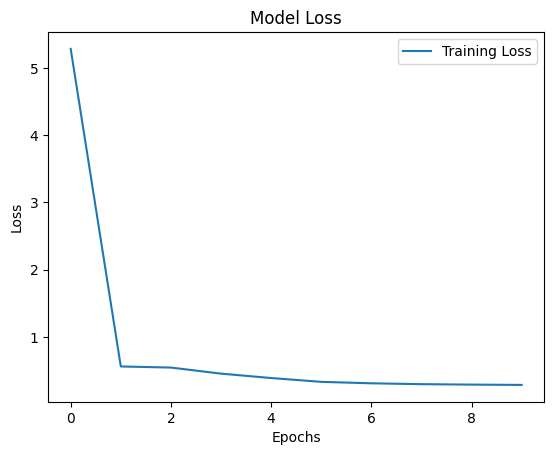

In [348]:
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


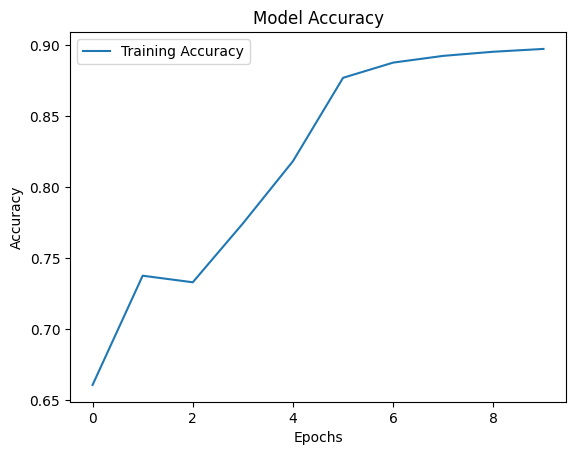

In [349]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('model.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

- In the data preprocessing step: I filled na values with mode and tried to save as many as possible rows. Moreover, I implemented SMOTE to tackle the imbalanced data I have. Then Splitted the data.

- Bulidnig the model architecture I started with building 3 hidden five in total with the input and the output layers. I first used sigmoid output activation function, but it did not perform well. I decided to use soft max and perfomance got higher using softmax.

- SparseCategoricalCrossentropy chosen because we have a multi class with two labels break down or running late with 10 epoch reached a reasonable accuracy for the training and testing without overfitting nor underfitting. I have used sparsecategoricalcrossentroy to tackle this problem because we have categorical target variable


- I have not faced any overfitting nor underfitting to use normalization techniques or increase the complexity of the model. I just reduced the numbers of layers which worked very good on the model's performance

- I used accuracy and tested the model on test dataset which generated a high accuracy. Moreover, I plotted loss and accuracy to visualized the performance of the model with each epoch. Recall and percesion could've been used but had no time to implement them.

- At first my model did not perform well with binary crossentroby and it was underfitting for some reason. I changed the approach to treat the two labels as multilabel with two neuron output layer which eventually increased model complexity . In case of overfitting, Using some regulariztion techniques could be helpful.